# Regression test suite: Test of basic SSP GCE features

Test of SSP with artificial yields of C,N,O + Ni provided in tables. 
C12 only in low-masss stars (up to 3Msun).
N14 only in intermediate mass stars (up to 7Msun).
O16 only in massive stars.
N-58 only in SNIa.
Each star produces only 0.1Msun of yields.

Focus are basic GCE features.
You can find the documentation <a href="doc/sygma.html">here</a>.


## Results:

$\odot$ Distinguished final ISM from different sources (low mass, massive AGB, massive stars, SN1a)

$\odot$ Evolution of different sources

$\odot$ Check of transition mass

$\odot$ Check of the exclude_masses parameter

$\odot$ IMPORTANT: Change of SNIa (time) contribution when changing the mass interval! Vogelsberger SNIa does not allow to only partly include SNIa contribution 

In [1]:
#from imp import *
#s=load_source('sygma','/home/nugrid/nugrid/SYGMA/SYGMA_online/SYGMA_dev/sygma.py')
import sygma as s
reload(s)
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#import mpld3
#mpld3.enable_notebook()

/home/christian/test/ipython/IPython/kernel/__init__.py:10: UserWarning: The `IPython.kernel` package has been deprecated. You should import from ipython_kernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated. "


The IMF allows to calculate the number of stars $N_{12}$ in the mass interval [m1,m2] with

(I) $N_{12}$ = k_N $\int _{m1}^{m2} m^{-2.35} dm$ 

Where k_N is the normalization constant. It can be derived from the total amount of mass of the system $M_{tot}$
since the total mass $M_{12}$ in the mass interval above can be estimated with

(II) $M_{12}$ = k_N $\int _{m1}^{m2} m^{-1.35} dm$

With a total mass interval of [1,30] and $M_{tot}=1e11$ the $k_N$ can be derived:

$1e11 = k_N/0.35 * (1^{-0.35} - 30^{-0.35})$

In [38]:
k_N=1e11*0.35/ (1**-0.35 - 30**-0.35) #(I)

The total number of stars $N_{tot}$ is then:

In [39]:
N_tot=k_N/1.35 * (1**-1.35 - 30**-1.35) #(II)

In [40]:
k_N=1e11*0.35/ (1**-0.35 - 30**-0.35)

### Distinguish between 2 sources (AGB,massive)

In [42]:
s1=s.sygma(iolevel=0,mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,imf_bdys=[1,30],sn1a_on=True,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_cnoni.txt', sn1a_table='yield_tables/sn1a_cnoni.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn')
print s1.history.isotopes
Yield_lagb_sim=s1.history.ism_iso_yield[-1][0]
Yield_magb_sim=s1.history.ism_iso_yield[-1][1]
Yield_massive_sim=s1.history.ism_iso_yield[-1][2]
Yield_sn1a_sim=s1.history.ism_iso_yield[-1][3]


self.imf_bdys_pop3=imf_bdys_pop3 [0.1, 100]
SYGMA run in progress..
__get_mfac
1,30 wrong
apply_imf_mass_bdys [1, 1.325, 1.825, 2.5, 3.5, 4.5, 5.5, 6.5, 8, 13.5, 17.5, 22.5, 30]
imf_bd [1, 30]
   SYGMA run completed - Run time: 0.8s
['C-12', 'N-14', 'O-16', 'Ni-58']


Using the mass boundaries chosen in the yield tables:

low mass AGB: till 4 [1,3.5]

massive AGB : till 8 [3.5,8] #Different because M12 star is missing in set1.2

massive stars till 30 [8,30]

In [43]:
N_lagb=k_N/1.35 * (1**-1.35 - 3.5**-1.35)
Yield_lagb=0.1*N_lagb
N_magb=k_N/1.35 * (3.5**-1.35 - 8.**-1.35)
Yield_magb=0.1*N_magb
N_massive=k_N/1.35 * (8.**-1.35 - 30**-1.35)
Yield_massive=0.1*N_massive

Compare final yields:

In [44]:
print 'Should be 1:',Yield_lagb_sim/Yield_lagb
print 'Should be 1:',Yield_magb_sim/Yield_magb
print 'Should be 1:',Yield_massive_sim/Yield_massive

Should be 1: 1.0
Should be 1: 1.0
Should be 1: 1.0


### Plotting

(7000000.0, 15000000000.0)

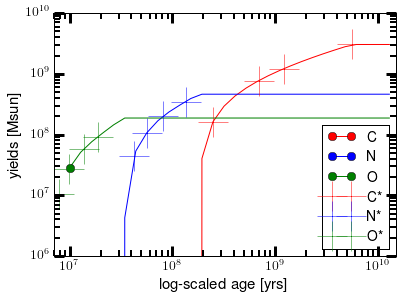

In [45]:
s1.plot_mass(specie='C',label='C',color='r',shape='-',marker='o',markevery=800)
s1.plot_mass(specie='N',label='N',color='b',shape='-',marker='o',markevery=800)
s1.plot_mass(specie='O',label='O',color='g',shape='-',marker='o',markevery=800)
m=[1,1.65,2,3,4,5,6,7,12,15,20,25]
#ages=[1.177e10,2.172e9,1.265e9,4.141e8,1.829e8,1.039e8,6.95e7,5.022e7,1.165e7,8.109e6,6.628e6]
ages=[5.67e9,1.211e9,6.972e8,2.471e8,1.347e8,8.123e7,5.642e7,4.217e7,1.892e7,1.381e7,9.895e6,7.902e6] #0.0001 lifetiems
def yields(min1,max1,k_N):
    return ( k_N/1.35 * (min1**-1.35 - max1**-1.35) ) * 0.1
yields1_lagb=[]
age_lagb=[]
yields1_magb=[]
age_magb=[]
yields1_massive=[]
age_massive=[]
for m1 in m:
    idx=m.index(m1)
    #print m1,idx
    if m1>=1 and m1<=3.5:
        yields1_lagb.append(yields(m1,3.5,k_N))
        age_lagb.append(ages[idx])
        #print yields(1,m1,k_N)
        #print ages[idx]
    if m1>=3.5 and m1<=8.:
        yields1_magb.append(yields(m1,8,k_N))
        age_magb.append(ages[idx])
    if m1>=8 and m1<=30:
        yields1_massive.append(yields(m1,30,k_N))
        age_massive.append(ages[idx])
plt.plot(age_lagb,yields1_lagb,marker='+',color='r',linestyle='',markersize=30,label='C*')
plt.plot(age_magb,yields1_magb,marker='+',color='b',linestyle='',markersize=30,label='N*')
plt.plot(age_massive,yields1_massive,marker='+',color='g',linestyle='',markersize=30,label='O*')
plt.legend(loc=4,prop={'size':14})
plt.xlim(7e6,1.5e10)

Simulation results compared with semi-analytical calculations with C,N,O.

### Distinguish between all 3 sources (AGB,massive AND SNIA)

#### DTD taken from Maoz

In [46]:
Yield_tot_sim=s1.history.ism_iso_yield_1a[-1][0]
from scipy.interpolate import UnivariateSpline
zm_lifetime_grid=s1.zm_lifetime_grid_current
idx_z = (np.abs(zm_lifetime_grid[0]-0.0001)).argmin() #Z=0
grid_masses=zm_lifetime_grid[1][::-1]
grid_lifetimes=zm_lifetime_grid[2][idx_z][::-1]
spline_degree1=2
smoothing1=0
boundary=[None,None]
spline_lifetime = UnivariateSpline(grid_lifetimes,np.log10(grid_masses),bbox=boundary,k=spline_degree1,s=smoothing1)

from scipy.integrate import quad

In [48]:
def spline1(t):
                minm_prog1a=3
                #if minimum progenitor mass is larger than 3Msun due to IMF range:
                return max(minm_prog1a,10**spline_lifetime(np.log10(t)))

            #funciton giving the total (accummulatitive) number of WDs at each timestep
def wd_number(m,t):
                #print 'time ',t
                #print 'mass ',m
                mlim=10**spline_lifetime(np.log10(t))
                maxm_prog1a=8

                if mlim>maxm_prog1a:
                        return 0
                else:
                        mmin=0
                        mmax=0
                        inte=0
                        #normalized to 1msun!
                        def g2(mm):
                            return mm*mm**-2.35
                        norm=1./quad(g2,1,30)[0]
                        return  norm*m**-2.35 #self.__imf(mmin,mmax,inte,m)

def maoz_sn_rate(m,t):
                        return  wd_number(m,t)* 4.0e-13 * (t/1.0e9)**-1

def maoz_sn_rate_int(t):
                return quad( maoz_sn_rate,spline1(t),8,args=t)[0]

#in this formula, (paper) sum_sn1a_progenitors number of 
maxm_prog1a=8
longtimefornormalization=1.3e10 #yrs
A = 1e-3 / quad(maoz_sn_rate_int,0,longtimefornormalization)[0]
print 'Norm. constant A:',A
n1a= A* quad(maoz_sn_rate_int,0,1.3e10)[0]
Yield_sn1a=n1a*1e11*0.1 #specialfactor

Norm. constant A: 8.42639846058


In [49]:
print 'Should be 1:',Yield_sn1a_sim/Yield_sn1a
print 'Check specific Ni-56: ',s1.history.ism_iso_yield[-1][-1]/Yield_sn1a #last isotope in s1.history.isotopes, see above

Should be 1: 0.999999821931
Check specific Ni-56:  0.999999821931


### Test of parameter transitionmass

#### default (above) is 8Msun; needs to chosen so it agrees with yield input!

In [2]:
s2=s.sygma(iolevel=0,transitionmass=7.2,mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,imf_bdys=[1,30],sn1a_on=False,table='yield_tables/isotope_yield_table_cnoni.txt', sn1a_table='yield_tables/sn1a_cnoni.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn')
s3=s.sygma(iolevel=0,transitionmass=8,mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,imf_bdys=[1,30],sn1a_on=False,table='yield_tables/isotope_yield_table_cnoni.txt', sn1a_table='yield_tables/sn1a_cnoni.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn')
s4=s.sygma(iolevel=0,transitionmass=9,mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,imf_bdys=[1,30],sn1a_on=False,table='yield_tables/isotope_yield_table_cnoni.txt', sn1a_table='yield_tables/sn1a_cnoni.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn')

correct for isotopes
SYGMA run in progress..
   SYGMA run completed - Run time: 0.18s
correct for isotopes
SYGMA run in progress..
   SYGMA run completed - Run time: 0.18s
correct for isotopes
SYGMA run in progress..
   SYGMA run completed - Run time: 0.21s


In [51]:
N_agb=k_N/1.35 * (1**-1.35 - 7.2**-1.35)
Yield_agb7=0.1*N_agb
N_massive=k_N/1.35 * (7.2**-1.35 - 30**-1.35)
Yield_massive7=0.1*N_massive
N_agb=k_N/1.35 * (1**-1.35 - 8.**-1.35)
Yield_agb8=0.1*N_agb
N_massive=k_N/1.35 * (8.**-1.35 - 30**-1.35)
Yield_massive8=0.1*N_massive
N_agb=k_N/1.35 * (1**-1.35 - 9.**-1.35)
Yield_agb9=0.1*N_agb
N_massive=k_N/1.35 * (9.**-1.35 - 30**-1.35)
Yield_massive9=0.1*N_massive
print sum(s2.history.ism_elem_yield_agb[-1])/Yield_agb7
print sum(s2.history.ism_elem_yield_massive[-1])/Yield_massive7
print sum(s3.history.ism_elem_yield_agb[-1])/Yield_agb8
print sum(s3.history.ism_elem_yield_massive[-1])/Yield_massive8
print sum(s4.history.ism_elem_yield_agb[-1])/Yield_agb9
print sum(s4.history.ism_elem_yield_massive[-1])/Yield_massive9

1.0
1.0
1.0
1.0
1.0
1.0


(4000000.0, 4000000000.0)

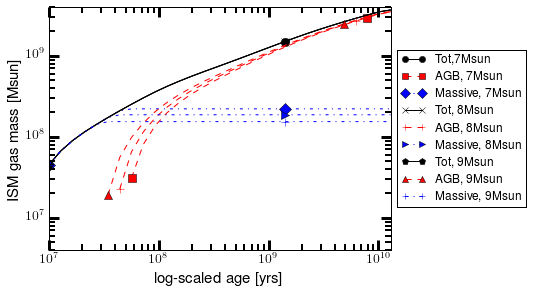

In [52]:
s2.plot_totmasses(mass='gas', source='all', norm='no', label='Tot,7Msun', shape='', marker='o', color='', markevery=20, log=True)
s2.plot_totmasses(mass='gas', source='agb', norm='no', label='AGB, 7Msun', shape='', marker='s', color='', markevery=20, log=True)
s2.plot_totmasses(mass='gas', source='massive', norm='no', label='Massive, 7Msun', shape='', marker='D', color='', markevery=20, log=True)
s3.plot_totmasses(mass='gas', source='all', norm='no', label='Tot, 8Msun', shape='', marker='x', color='', markevery=20, log=True)
s3.plot_totmasses(mass='gas', source='agb', norm='no', label='AGB, 8Msun', shape='', marker='+', color='', markevery=20, log=True)
s3.plot_totmasses(mass='gas', source='massive', norm='no', label='Massive, 8Msun', shape='', marker='>', color='', markevery=20, log=True)
s4.plot_totmasses(mass='gas', source='all', norm='no', label='Tot, 9Msun', shape='', marker='p', color='', markevery=20, log=True)
s4.plot_totmasses(mass='gas', source='agb', norm='no', label='AGB, 9Msun', shape='', marker='^', color='', markevery=20, log=True)
s4.plot_totmasses(mass='gas', source='massive', norm='no', label='Massive, 9Msun', shape='', marker='+', color='', markevery=20, log=True)
plt.legend(prop={'size':12})
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),markerscale=0.8,fontsize=12)
plt.ylim(4e6,4e9)

### Check of the exclude_masses parameter

Default is exclude_masses=[32.,60.] because both can be only used in SSPs of solar Z and in no continous SFR simulations.
This test requires to check the output and see if there is any 6M or 7Msun yield taken.

In [4]:
reload(s)
s1=s.sygma(iolevel=0,exclude_masses=[32.,60.],mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,imf_bdys=[1,30],sn1a_on=False,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_cnoni.txt', sn1a_table='yield_tables/sn1a_cnoni.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn')
s2=s.sygma(iolevel=0,exclude_masses=[32.,60.,7,6],mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,imf_bdys=[1,30],sn1a_on=False,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_cnoni.txt', sn1a_table='yield_tables/sn1a_cnoni.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn')
#s3=s.sygma(iolevel=1,exclude_masses=[],mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,imf_bdys=[1,30],sn1a_on=True,iniZ=-1,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_cnoni.txt', sn1a_table='yield_tables/sn1a_cnoni.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn')
s3=s.sygma(iolevel=0,exclude_masses=[32.,60.,7,6,3],mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,imf_bdys=[1,30],sn1a_on=False,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_cnoni.txt', sn1a_table='yield_tables/sn1a_cnoni.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn')

 correct for isotopes
SYGMA run in progress..
   SYGMA run completed - Run time: 0.18s
correct for isotopes
SYGMA run in progress..
   SYGMA run completed - Run time: 0.18s
correct for isotopes
SYGMA run in progress..
   SYGMA run completed - Run time: 0.2s


In [ ]:
# k_N=1e11*0.35/ (1**-0.35 - 30**-0.35) #(I)
N_tot=k_N/1.35 * (1**-1.35 - 30**-1.35) #(II)
Yield=0.1*N_tot
print 'Should be 1:',sum(s1.history.ism_iso_yield[-1])/Yield
print 'Should be 1:',sum(s2.history.ism_iso_yield[-1])/Yield

In [6]:
N_tot=k_N/1.35 * (1**-1.35 - 8**-1.35) #(II)
Yield=0.1*N_tot
print sum(s1.history.ism_elem_yield_agb[-1])/Yield
N_tot=k_N/1.35 * (8**-1.35 - 30**-1.35) #(II)
Yield=0.1*N_tot
print sum(s1.history.ism_elem_yield_massive[-1])/Yield

1.0
1.0


#### For case where 3Msun excluded, which is low-mass with C, the boundary (3.5Msun) changes to 3Msun and hence N-14 is ejected in lower-mass stars. 

In [7]:
Yield_lagb_sim=s3.history.ism_iso_yield[-1][0]
Yield_magb_sim=s3.history.ism_iso_yield[-1][1]
Yield_massive_sim=s3.history.ism_iso_yield[-1][2]

In [8]:
N_lagb=k_N/1.35 * (1**-1.35 - 3**-1.35)
Yield_lagb=0.1*N_lagb
N_magb=k_N/1.35 * (3**-1.35 - 8.**-1.35)
Yield_magb=0.1*N_magb
N_massive=k_N/1.35 * (8.**-1.35 - 30**-1.35)
Yield_massive=0.1*N_massive

In [9]:
print 'Should be 1:',Yield_lagb_sim/Yield_lagb
print 'Should be 1:',Yield_magb_sim/Yield_magb
print 'Should be 1:',Yield_massive_sim/Yield_massive

Should be 1: 1.0
Should be 1: 1.0
Should be 1: 1.0


### With transitionmass and exclude_mass: Change transitionmass to 6Msun

In [8]:
s1=s.sygma(iolevel=1,exclude_masses=[32.,60.,7,6],transitionmass=6,mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,imf_bdys=[1,30],sn1a_on=False,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_cnoni.txt', sn1a_table='yield_tables/sn1a_cnoni.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn')
s2=s.sygma(iolevel=1,exclude_masses=[32.,60.,12],transitionmass=13,mgal=1e11,dt=1e7,tend=1.3e10,imf_type='salpeter',alphaimf=2.35,imf_bdys=[1,30],sn1a_on=False,hardsetZ=0.0001,table='yield_tables/isotope_yield_table_cnoni.txt', sn1a_table='yield_tables/sn1a_cnoni.txt', iniabu_table='yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn')

Non-default transitionmass chosen. Use in agreementwith yield input!
correct for isotopes
Warning - Use isotopes with care.
['C-12', 'N-14', 'O-16', 'Ni-58']
Use initial abundance of  yield_tables/iniabu/iniab1.0E-04GN93_alpha_cnoni.ppn
Number of timesteps:  3.0E+01
### Start with initial metallicity of  1.0000E-04
###############################
SYGMA run in progress..
################## Star formation at  1.000E+07 (Z=1.0000E-04) of  1.0
Mass locked away: 1.000E+11 , new ISM mass: 0.000E+00
Stars under consideration (take into account user-selected imf ends):
[1.0, 1.65, 2.0, 3.0, 4.0, 5.0, 12.0, 15.0, 20.0, 25.0]
with (corrected) mass bdys:####
[1, 1.325, 1.825, 2.5, 3.5, 4.5, 6, 13.5, 17.5, 22.5, 30]
Scaling factor for gas mass (mfac) 1.0
Total mass of the gas in stars:
0.000E+00
AGB:  6.694E+10
Massive:  3.306E+10
time and metallicity and total mass:
1.640E+07 1.0000E-04 5.1073E+07
time and metallicity and total mass:
1.640E+07 1.0000E-04 5.1073E+07
time and metallicity and total 

In [4]:
k_N=1e11*0.35/ (1**-0.35 - 30**-0.35) #(I)
N_tot=k_N/1.35 * (1**-1.35 - 30**-1.35) #(II)
Yield=0.1*N_tot
print 'Should be 1:',sum(s1.history.ism_iso_yield[-1])/Yield

 Should be 1: 1.0


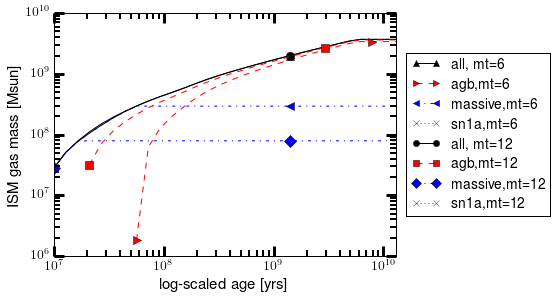

In [11]:
s1.plot_totmasses(marker='^',label='all, mt=6')
s1.plot_totmasses(marker='>',source='agb',label='agb,mt=6')
s1.plot_totmasses(marker='<',source='massive',label='massive,mt=6')
s1.plot_totmasses(source='sn1a',label='sn1a,mt=6')
s2.plot_totmasses(label='all, mt=12')
s2.plot_totmasses(source='agb',label='agb,mt=12')
s2.plot_totmasses(source='massive',label='massive,mt=12')
s2.plot_totmasses(source='sn1a',label='sn1a,mt=12')